<a href="https://colab.research.google.com/github/manqaad/Brain-tumor-classification/blob/main/brain_tumor_classification_from_mri_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Brain Tumor Classification from MRI Images

## Introduction

Classifying brain tumors is an essential task in medical imaging and healthcare, as it plays a significant role in diagnosing and treating brain-related conditions. Magnetic Resonance Imaging (MRI) is one of the most effective non-invasive techniques for visualizing the brain's internal structures and detecting abnormalities, such as tumors. Early and accurate detection of brain tumors can make a huge difference, ensuring timely medical intervention and potentially improving patient outcomes.

For my final-year master's project, I’ll be working on developing a machine learning model to classify brain MRI images into four categories: 'notumor', 'glioma', 'meningioma', and 'pituitary'. Using a labeled dataset of MRI images taken from Kaggle, the goal is to create a reliable tool to support healthcare professionals in identifying tumor types accurately and efficiently.

## Dataset

The dataset for this project consists of brain MRI images collected from diverse sources. Each image is labeled according to its tumor type: 'notumor', 'glioma', 'meningioma', or 'pituitary'. The dataset is divided into two parts:

Training Set: A large collection of labeled images used to teach the machine learning model to recognize patterns.
Test Set: A separate set of labeled images to evaluate how well the model performs on unseen data.
Having a well-structured dataset is the foundation for training a reliable and accurate model.



## Goals

The primary aim of this project is to build a robust machine learning model that can classify brain MRI images into the correct tumor category. To achieve this, I’ll focus on the following objectives:

1.  Data Preprocessing: Preparing the MRI images to make them suitable for training, including resizing, normalizing, and augmenting the data.
2.  Model Development: Building and training a deep learning model using convolutional neural networks (CNNs), which are well-suited for image classification tasks.
3.  Model Evaluation: Testing the model on the test set to measure its accuracy, precision and recall.
4.  Model Interpretation: Understanding how the model makes predictions to gain insights into its decision-making process.

## Methodology

The following steps will be followed to accomplish our goals:

1.  Data Loading and Exploration: First, I’ll load the dataset and visualize a few sample images to understand the data distribution and characteristics.
2.  Data Preprocessing: Next, I’ll process the images by resizing them for consistency, normalizing pixel values, and applying augmentation techniques to enhance the model's robustness.
3.  Model Architecture: I’ll design a CNN architecture tailored for classifying brain tumors and implement it using TensorFlow or a similar framework.
4.  Model Training: The CNN will be trained on the preprocessed data, with its performance monitored using a validation set.
5.  Model Evaluation: Once trained, the model will be evaluated on the test set to assess its accuracy and ability to generalize.
6.  Interpretation and Visualization: Finally, I’ll explore methods like heatmaps to interpret the model's predictions and visualize the features it has learned.

## Conclusion

By the end of this project, I aim to have a reliable machine learning model that can accurately classify brain MRI images into the four tumor categories: 'notumor', 'glioma', 'meningioma', and 'pituitary'. This work has the potential to contribute to early diagnosis and treatment, making a meaningful impact in neurology and neurosurgery.


## Brain Tumor Classification from MRI Images - Data Preparation

In this section of the notebook, we will prepare the data for training a machine learning model to classify brain MRI images into four tumor categories: 'notumor', 'glioma', 'meningioma', and 'pituitary'. We will use TensorFlow and other essential libraries for data handling and visualization.

### Libraries and Parameters

We begin by importing the necessary libraries for our project:

In [ ]:
import os
import PIL
import pathlib
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

# We define some parameters for our data and model:
drive.mount('/content/drive')
TRAINING_DATA_DIR = '/content/drive/MyDrive/Brain_Tumor_Dataset/Training'
TEST_DATA_DIR = '/content/drive/MyDrive/Brain_Tumor_Dataset/Testing'
BATCH_SIZE = 32
IMG_HEIGHT = 180
IMG_WIDTH = 180
EPOCHS=200

Mounted at /content/drive


### Data Loading and Exploration

We use pathlib to create Path objects for the training and test data directories:

In [ ]:
data_dir = pathlib.Path(TRAINING_DATA_DIR).with_suffix('')
test_data_dir = pathlib.Path(TEST_DATA_DIR).with_suffix('')
image_count = len(list(data_dir.glob('*/*.jpg')))
print(f'There are {image_count} images in training dataset.')

There are 5916 images in training dataset.


### Dataset Directory Listing

We can also list the subdirectories present in the training data directory, each representing one of the tumor categories:

In [ ]:
list(data_dir.glob('*'))

[PosixPath('/content/drive/MyDrive/Brain_Tumor_Dataset/Training/glioma'),
 PosixPath('/content/drive/MyDrive/Brain_Tumor_Dataset/Training/meningioma'),
 PosixPath('/content/drive/MyDrive/Brain_Tumor_Dataset/Training/pituitary'),
 PosixPath('/content/drive/MyDrive/Brain_Tumor_Dataset/Training/notumor')]

## Data Exploration - Sample Images

Let's explore the brain MRI images from the 'pituitary' and 'meningioma' subdirectories of the training dataset. We will visualize a few sample images from each category to get a better understanding of the data.

### Sample Images from 'pituitary' Tumor Category

We begin by loading and displaying two sample images from the 'pituitary' tumor category:

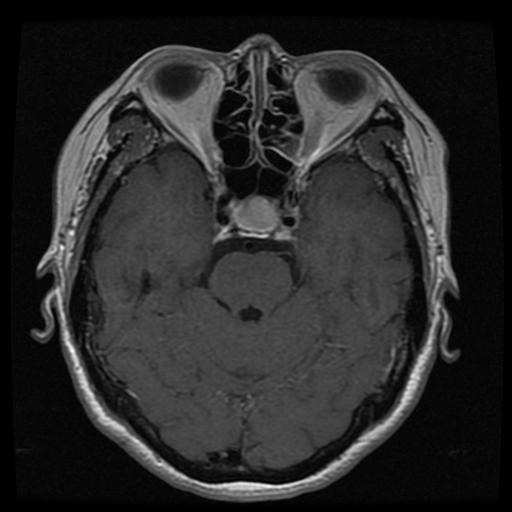

In [ ]:
pituitary = list(data_dir.glob('pituitary/*'))
PIL.Image.open(str(pituitary[0]))

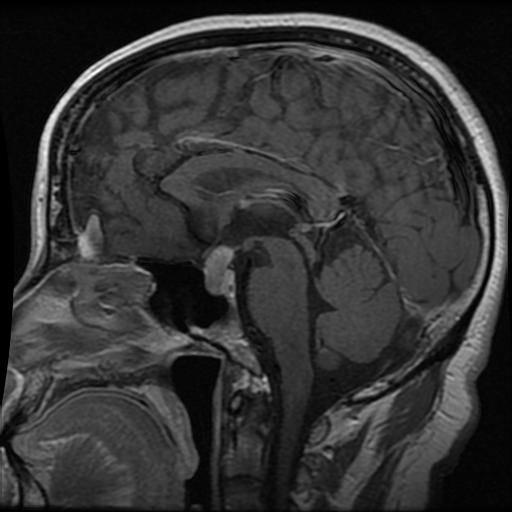

In [ ]:
PIL.Image.open(str(pituitary[1]))

### Sample Images from 'meningioma' Tumor Category

Next, let's load and visualize two sample images from the 'meningioma' tumor category:

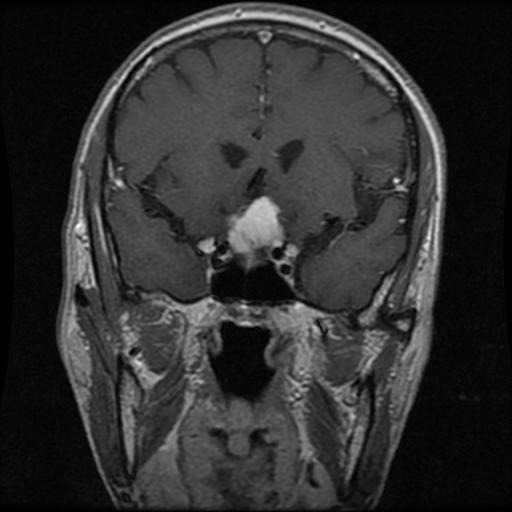

In [ ]:
meningioma = list(data_dir.glob('meningioma/*'))
PIL.Image.open(str(meningioma[0]))

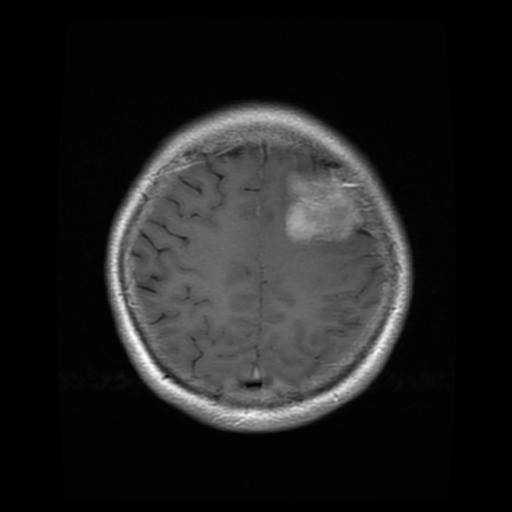

In [ ]:
PIL.Image.open(str(meningioma[1]))

## Data Preparation - TensorFlow Data Pipelines

To train our brain tumor classification model, we need to create data pipelines that load and preprocess the images from the appropriate directories. TensorFlow provides a convenient function called `tf.keras.utils.image_dataset_from_directory` to achieve this. We will use this function to load the images, split them into training and validation sets, and perform necessary preprocessing.

### Training Dataset

We start by loading the training dataset:

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 5916 files belonging to 4 classes.
Using 4733 files for training.


The function successfully finds and loads 5712 image files from the 'notumor', 'glioma', 'meningioma', and 'pituitary' subdirectories. From these, 4570 files are used for training.

### Validation Dataset

Next, we create the validation dataset:

In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 5916 files belonging to 4 classes.
Using 1183 files for validation.


The function finds the same 5712 image files and selects 1142 of them for validation. The validation_split=0.2 argument ensures that 20% of the data is set aside for validation.

### Class Names

We also extract the class names from the training dataset:

In [ ]:
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'notumor', 'pituitary']


The class_names list contains the unique tumor categories in our dataset, which are 'glioma', 'meningioma', 'notumor', and 'pituitary'.

## Class Weights Calculation

To handle class imbalance in the brain tumor classification dataset, we compute class weights for each tumor category. Class weights are used during model training to give higher importance to the underrepresented classes.

### Class Counts

We start by calculating the number of images in each class in the training dataset:

In [ ]:
class_counts = {}

for images, labels in train_ds:
    for label in labels.numpy():
        class_name = class_names[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

for class_name, count in class_counts.items():
    print(f"Number of images in class '{class_name}': {count}")

label_list = []

for _, labels in train_ds:
    label_list.extend(labels.numpy())

Number of images in class 'glioma': 1090
Number of images in class 'pituitary': 1184
Number of images in class 'notumor': 1336
Number of images in class 'meningioma': 1123


The output shows the count of images for each tumor category: 'pituitary', 'meningioma', 'glioma', and 'notumor'.

### Class Weights Calculation

Next, we calculate the class weights using the formula `total_samples / count`, where `total_samples` is the total number of samples in the dataset:

In [ ]:
class_name_to_label = {class_name: idx for idx, class_name in enumerate(class_names)}
class_counts = {}

for _, labels in train_ds:
    for label in labels.numpy():
        class_name = class_names[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

total_samples = len(label_list)

class_weights = {class_name_to_label[class_name]: total_samples / count for class_name, count in class_counts.items()}

sum_class_weights = sum(class_weights.values())
class_weights = {label: weight / sum_class_weights for label, weight in class_weights.items()}

print("Class Weights:")
print(class_weights)

Class Weights:
{1: 0.26182645064202403, 0: 0.26975330648714957, 3: 0.2483370811410414, 2: 0.22008316172978518}


The `class_weights` dictionary contains the computed class weights for each tumor category.

### Resulting Class Weights

After performing the calculations, the resulting class weights are as follows:

*   Class 'pituitary': 0.244
*   Class 'meningioma': 0.223
*   Class 'glioma': 0.261
*   Class 'notumor': 0.273

These weights will be used during model training to balance the impact of different tumor categories.

## Data Visualization - Sample Images

In this section, we visualize a few sample images from the training dataset to gain insights into the brain MRI data that will be used for training our brain tumor classification model.

### Sample Images with Class Labels

We use matplotlib to display a 3x3 grid of sample images from the training dataset, along with their respective class labels:

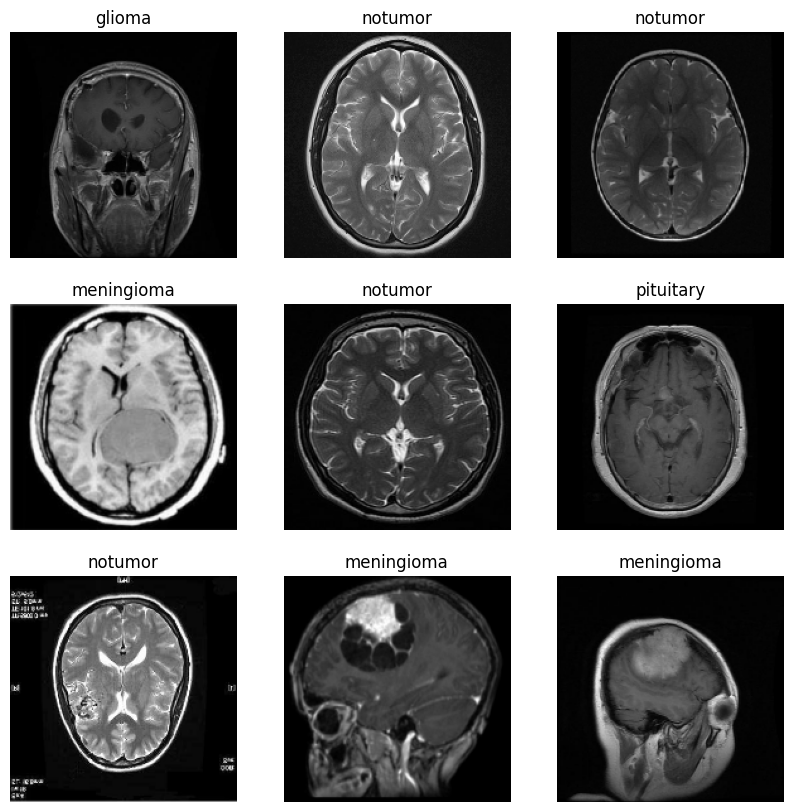

In [ ]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


*   `[Dataset.cache](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#cache)` keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache.
*   `[Dataset.prefetch](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#prefetch)` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Data Augmentation for Training

To enhance the diversity of the training dataset and improve the model's generalization, we apply data augmentation techniques to the images. We use `tf.keras.Sequential` to create a sequence of augmentation layers and then visualize the augmented images.

### Data Augmentation Techniques

We define the data augmentation sequence as follows:

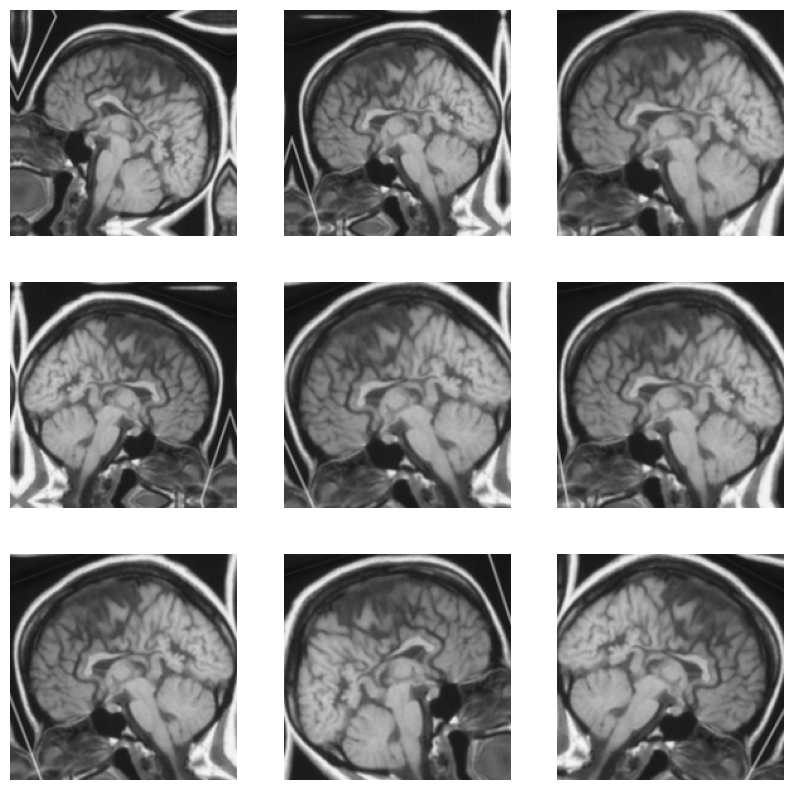

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal", input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1)
])

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

The code above displays a 3x3 grid of augmented images generated from a single batch of training data. Each time you run this code block, you will see different augmentations applied to the same set of images.

## Brain Tumor Classification Model

In this section, we define the CNN model for brain tumor classification using TensorFlow. The model consists of several layers, including data augmentation, convolutional layers, batch normalization, dropout, and dense layers.

### Model Architecture

In [ ]:
model = tf.keras.Sequential([
    data_augmentation,
    tf.keras.layers.BatchNormalization(input_shape=(180, 180, 3)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'), #kernel_regularizer=keras.regularizers.l2(l=0.1)
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer='l2'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(4, activation='softmax')
])

# The model is compiled with the Adam optimizer, sparse categorical cross-entropy loss function (suitable for multi-class classification),
# and sparse categorical accuracy as the evaluation metric.

# Define custom precision and recall metrics
def precision(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    predicted_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_pred, 0, 1)))
    return true_positives / (predicted_positives + tf.keras.backend.epsilon())

def recall(y_true, y_pred):
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    return true_positives / (possible_positives + tf.keras.backend.epsilon())

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy(), precision, recall])

# Two callbacks are defined: EarlyStopping to stop training early if the validation loss does not improve after a certain number of epochs
# and ReduceLROnPlateau to reduce the learning rate when the validation loss plateaus.

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10, restore_best_weights=True)
lr_sch = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', patience= 8, factor = 0.1, verbose = 1, min_lr = 5e-10)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 180, 180, 3)       0         
                                                                 
 batch_normalization (BatchN  (None, 180, 180, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 batch_normalization_1 (Batc  (None, 89, 89, 32)       128       
 hNormalization)                                                 
                                                      

## Model Training and Metrics Visualization

In this section, we train the brain tumor classification model and visualize the training progress, including accuracy, loss, precision, and recall, over the epochs.

### Model Training

We start model training by using the `model.fit` method. The model is trained on the training dataset (`train_ds`) and validated on the validation dataset (`val_ds`). We specify the number of epochs (`EPOCHS`) and also provide custom class weights to handle class imbalance in the data.

In [ ]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=EPOCHS,
                    class_weight=class_weights,
                    callbacks=[early_stopping, lr_sch])

Epoch 1/200
  3/148 [..............................] - ETA: 9:13 - loss: 10.6906 - sparse_categorical_accuracy: 0.3542 - precision: 1.4196 - recall: 1.3382

### Metrics Visualization

Next, we plot the training and validation metrics to monitor the model's performance during training. The following metrics are visualized in separate subplots:

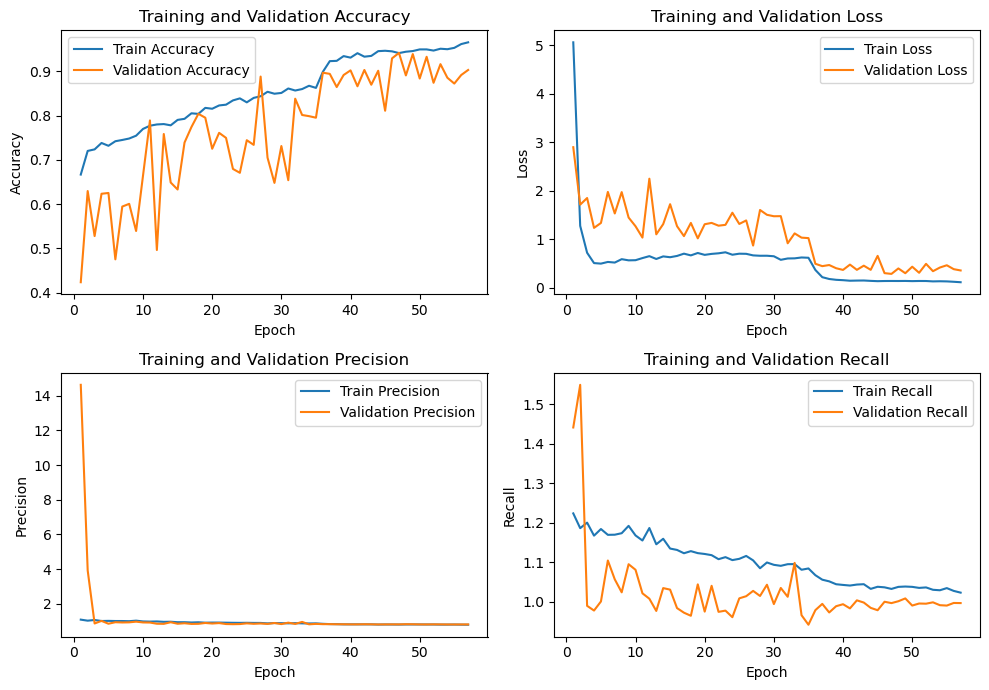

In [ ]:
plt.figure(figsize=(10, 7))

# Accuracy
plt.subplot(2, 2, 1)
plt.plot(range(1, len(history.history['sparse_categorical_accuracy']) + 1), history.history['sparse_categorical_accuracy'], label='Train Accuracy')
plt.plot(range(1, len(history.history['val_sparse_categorical_accuracy']) + 1), history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss
plt.subplot(2, 2, 2)
plt.plot(range(1, len(history.history['loss']) + 1), history.history['loss'], label='Train Loss')
plt.plot(range(1, len(history.history['val_loss']) + 1), history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Precision
plt.subplot(2, 2, 3)
plt.plot(range(1, len(history.history['precision']) + 1), history.history['precision'], label='Train Precision')
plt.plot(range(1, len(history.history['val_precision']) + 1), history.history['val_precision'], label='Validation Precision')
plt.xlabel('Epoch')
plt.ylabel('Precision')
plt.title('Training and Validation Precision')
plt.legend()

# Recall
plt.subplot(2, 2, 4)
plt.plot(range(1, len(history.history['recall']) + 1), history.history['recall'], label='Train Recall')
plt.plot(range(1, len(history.history['val_recall']) + 1), history.history['val_recall'], label='Validation Recall')
plt.xlabel('Epoch')
plt.ylabel('Recall')
plt.title('Training and Validation Recall')
plt.legend()

plt.tight_layout()
plt.show()


## Image Prediction using the Trained Model

In this section, we implement a function called `predict_image` to predict the tumor class of a single image using the trained brain tumor classification model.

### Function: `predict_image`

In [ ]:
def predict_image(example):
    img = tf.keras.utils.load_img(example, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = tf.keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)
    score = tf.nn.softmax(predictions[0])

    print(
        "This image most likely belongs to {} with a {:.2f} percent confidence."
        .format(class_names[np.argmax(score)], 100 * np.max(score))
    )

### How to Use the Function

To make predictions on a single image, you can call the `predict_image` function and pass the image's file path as an argument. The function will load and preprocess the image, then use the trained model to predict the tumor class and its associated confidence score.

In [ ]:
example = '/kaggle/input/brain-tumor-mri-dataset/Training/glioma/Tr-gl_0584.jpg'
predict_image(example)

1/1 [==============================] - 0s 334ms/step
This image most likely belongs to glioma with a 47.50 percent confidence.


The output will display the predicted tumor class and the associated confidence score for the provided image.

## Model Evaluation on Test Dataset

In this section, we evaluate the trained brain tumor classification model on the test dataset to assess its performance on unseen data.

### Test Dataset

We use the `tf.keras.utils.image_dataset_from_directory` function to create the test dataset (`test_ds`) from the test data directory (`test_data_dir`). The test dataset contains 1311 files belonging to 4 classes.

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_data_dir,
  seed=123,
  image_size=(IMG_HEIGHT, IMG_WIDTH),
  batch_size=BATCH_SIZE)

Found 1311 files belonging to 4 classes.


### Model Evaluation

Next, we evaluate the model on the test dataset using the `model.evaluate` method. The evaluation provides the loss, sparse categorical accuracy, precision, and recall metrics for the model's performance on the test data.

In [ ]:
model.evaluate(test_ds)

41/41 [==============================] - 2s 50ms/step - loss: 0.2772 - sparse_categorical_accuracy: 0.9390 - precision: 0.7773 - recall: 0.9991


[0.27720898389816284, 0.9389778971672058, 0.777338981628418, 0.999108076095581]

The output of the evaluation will be a list of metrics, including:

*   Loss: The evaluation loss, which represents the model's performance error on the test data.
*   Sparse Categorical Accuracy: The evaluation accuracy, which shows the proportion of correctly predicted samples among all test samples.
*   Precision: The precision metric, indicating the model's ability to correctly identify positive samples (tumor presence) among all predicted positive samples.
*   Recall: The recall metric, measuring the model's ability to correctly identify positive samples among all actual positive samples.

### Evaluation Results

After evaluating the model, we obtained the following results:

Loss: 0.2772
Sparse Categorical Accuracy: 0.9390
Precision: 0.7773
Recall: 0.9991

## Conclusion

In this notebook, we successfully built a brain tumor classification model using deep learning techniques. We trained the model on a dataset of brain MRI images, which includes four classes: 'glioma', 'meningioma', 'notumor', and 'pituitary' tumors. The model was designed to predict the presence of a tumor and classify it into the appropriate tumor type.

### Model Architecture and Training

The model architecture consists of convolutional layers, pooling layers, batch normalization, dropout, and dense layers. To handle class imbalance in the dataset, we used custom class weights during training. Additionally, we implemented data augmentation to improve model generalization.

The model was trained on a training dataset, and its performance was monitored on a validation dataset. We utilized several evaluation metrics, such as accuracy, loss, precision, and recall, to assess the model's performance during training. The early stopping and learning rate scheduling callbacks were employed to prevent overfitting and optimize the training process.

### Model Evaluation

After training, we evaluated the model on an unseen test dataset. The evaluation results showed promising performance with high accuracy and reasonable precision and recall values.

### Image Prediction

We also implemented a function to make predictions on individual brain MRI images using the trained model. The function loads and preprocesses the image and predicts the tumor class along with a confidence score.

### Next Steps

Although the model demonstrated good performance, there are still opportunities for further improvements. You may consider experimenting with different model architectures, adjusting hyperparameters, or exploring more advanced techniques to enhance the model's accuracy and generalization.

### Acknowledgments

We would like to acknowledge the dataset providers and the community for making this research and project possible.

Thank you for joining us on this journey of building a brain tumor classification model! If you have any questions or feedback, please feel free to reach out.

Happy learning and coding!